In [ ]:
!pip install --upgrade pandas

### ***PAQUETES***

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv	Meteorite_Landings.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv	poblacion.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv	test.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv	test.hdf
API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv	test.json
covid_19_data.csv				test.parquet
flights.db					test.pkl
GlobalLandTemperaturesByCountry.csv		test.xlsx
london_merged.csv


In [ ]:
import pandas as pd
pd.__version__

'1.3.4'

### ***SERIES DE TIEMPO*** Clase N° 24/29

Guardo mi archivo en un nuevo df(read es para leer el archivo)

sample me muestra solo algunos de los registros que hay

`ObservationDate -> Fecha de observacion`

`Province/State -> Provincia/estado`

`Country/Region -> País/Región`

`Last Update -> Ultima actualización`

`Confirmed -> Confirmados`

`Deaths -> Fallecidos`

`Recovered -> Recuperados`

In [ ]:
df = pd.read_csv('covid_19_data.csv')
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
11,12,01/22/2020,Henan,Mainland China,1/22/2020 17:00,5.0,0.0,0.0
1330,1331,02/12/2020,Tibet,Mainland China,2020-02-12T06:43:02,1.0,0.0,1.0
2057,2058,02/22/2020,Inner Mongolia,Mainland China,2020-02-22T23:53:01,75.0,0.0,26.0
880,881,02/06/2020,Victoria,Australia,2020-02-01T18:12:49,4.0,0.0,0.0
2084,2085,02/22/2020,NaN,Spain,2020-02-15T17:23:04,2.0,0.0,2.0
2527,2528,02/27/2020,NaN,UK,2020-02-27T13:23:02,15.0,0.0,8.0
3212,3213,03/03/2020,NaN,Sri Lanka,2020-02-08T03:43:03,1.0,0.0,1.0
2292,2293,02/25/2020,Jiangxi,Mainland China,2020-02-25T15:03:05,934.0,1.0,683.0
1837,1838,02/19/2020,Victoria,Australia,2020-02-13T17:53:03,4.0,0.0,4.0
1670,1671,02/17/2020,Ningxia,Mainland China,2020-02-17T11:03:06,70.0,0.0,35.0


Le doy formato al df, a la segunda columna(ObservationDate) en tipo tiempo

In [ ]:
df = pd.read_csv('covid_19_data.csv')
df.sample(10)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate']) # <---
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3390,3391,2020-03-04,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,2020-03-04,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,2020-03-04,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,2020-03-04,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


Para ver(listar) todas las columnas

In [ ]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

Copio la lista anterior y borro las columnas con las cuales no voy a trabajar

MI NUEVO DF

In [ ]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
 
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


Creo un nuevo df(df_time) y lo agrupo

Para cada uno de mis dias voy viendo el numero de casos confirmados, fallecidos y recuperados



In [ ]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


Hago una seleccion de datos(lo llamo df1 y df2), tomo una muestra(iloc)



In [ ]:
df1 = df_time['Confirmed'].iloc[10:15] # Hago una seleccion de filas de 10 a 15
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [ ]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

**Cuando tengo dos series con un sistema de indices por fecha, puedo hacer operaciones entre las mismas**

En este caso estoy restando el numero de casos confirmados con el numero de casos de fallecidos, y como resultado me da sobrevivientes hasta la fecha asignada

El resultado de esta operacion van a ser los sobrevivientes


In [ ]:
df1 - df2 # Donde no comparto datos entre si, me devuelve error (NaN) nula. 

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

Este df data con informacion desde el 22 de enero de 2020(principio de las detecciones con 555 casos) hasta el 4 de marzo de 2020(alrededor de 100000 casos)

**Para ver como ha ido aumentando dia tras dia la cifra del coronavirus 🦠**

In [ ]:
df_time.diff() # Diff lo que hace es restar cada dia, con el dia previo (no me muestra el primer dia)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


El promedio de casos de todos los dias

In [ ]:
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

Para ver mi primer resultado que aparece nulo NaN

In [ ]:
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Obtengo mi primer resultado(head 1) en un diccionario:

In [ ]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

Copio el diccionario y borro todo lo que tenga que ver con el tiempo, dejando solo la variable numérica

In [ ]:
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})

In [ ]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Función Suma acumulativa (contando los datos acumulados dia tras dia)

In [ ]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


**Con resample puedo extraer valor estadistico, segun un intervalo definido por nosotros**

Se me van a sumar valores de 7 dias(1 semana) en la fila del dia 22 de enero y asi sucesivamente con el 29, 05, 12, etc

In [ ]:
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,2280.0,94.0,2942.0


Si quiero ver resultados semanales, de cada Domingo

In [ ]:
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


Resultados mensuales

In [ ]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


La razon de porque febrero tiene mas casos que enero y marzo

Contamos cuantos registros se estan llevando:

Enero: 22 al 31 (10 registros)

Febrero: todo el mes (29 registros)

Marzo: solo contemenos 4 registros

In [ ]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,4,4,4


Aplicar promedio u otra función:

In [ ]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,2277.750000,78.250000,2847.250000


### ***SERIES DE TIEMPO: VARIABLES NULAS*** Clase N° 25/29

Se me autocompletan con cero las variables no definidas

In [ ]:
df_diff.resample('12h').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-03-02 00:00:00,1938.0,89.0,2886.0
2020-03-02 12:00:00,0.0,0.0,0.0
2020-03-03 00:00:00,2535.0,75.0,2627.0


Se me generan valores nulos(NaN) en los ceros

In [ ]:
df_diff.resample('12h').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-03-02 00:00:00,1938.0,89.0,2886.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,2535.0,75.0,2627.0


Para que se realice la suma haya al menos 1 elemento(minimo_contar=1)

In [ ]:
df_diff.resample('12h').sum(min_count=1) # Casos por día no acumulados

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-03-02 00:00:00,1938.0,89.0,2886.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,2535.0,75.0,2627.0


In [ ]:
df_cum = df_time.resample('12h').sum(min_count=1) # Casos por día acumulados
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


***`Bfill`*** lo que hace es copiar el valor siguiente, en la celda donde habia un valor nulo o vacio 

In [ ]:
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,653.0,18.0,30.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,92844.0,3160.0,48229.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


O también ***`ffill`*** que lo que hace es traerme el valor previo para completar valor nulo

In [ ]:
df_cum.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,555.0,17.0,28.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,653.0,18.0,30.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,90309.0,3085.0,45602.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


Con ***`fillna`*** coloco el valor que yo quiera

In [ ]:
df_cum.fillna(-1000)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,-1000.0,-1000.0,-1000.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


Con ***`interpolate`*** hacemos que se tome un valor medio(promedio) entre el previo y el siguiente numero

In [ ]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,91576.5,3122.5,46915.5
2020-03-03 00:00:00,92844.0,3160.0,48229.0


Creamos una columna que es una taza de supervivencia al coronavirus(rate), dividiendo el numero de muertos con los casos confirmados

In [ ]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed'] 

In [ ]:
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964


Modificamos el df: La columna que es el indice, la reseteamos

In [ ]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


***¿Cómo podriamos extraer información cuando la variable tipo tiempo es simplemente otra columna más?***

Para eso vamos a usar un groupby diferente, es especial para usarse con series de tiempo(Grouper(La llave de aquí hace referencia a la columna donde se guarda la información tipo tiempo, y la frecuencia hace referencia mensual))

Voy a estimar si en cada uno de los meses mi taza de superviviencia a tenido variación (enero, febrero, marzo), lo que noto es que no hay mucha variación 

In [ ]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M')) [['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


Otra operación estadistica llamada rolling, vemos esto en forma gráfica con .plot(), que me muestra como a variado mi taza de supervivencia a través del tiempo ⌛, vemos como en marzo va disminuyendo 

`sr(serie)`

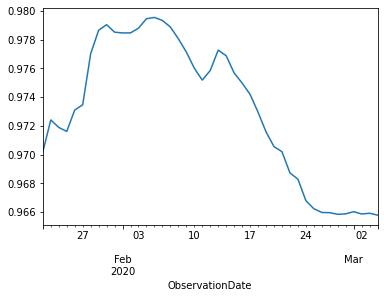

In [ ]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D')) ['rate'].mean()
sr.plot()

Ya que es una serie con una columna de tipo tiempo, sobre está puedo aplicar también el operador .rolling() que me permite hacer promedios con unas ventanas de frecuencia(window=7 una ventana que se desplace a cada 7 días) y que en ésta ventana me siga calculando el promedio . mean() y .plot() para verlo gráficamente 

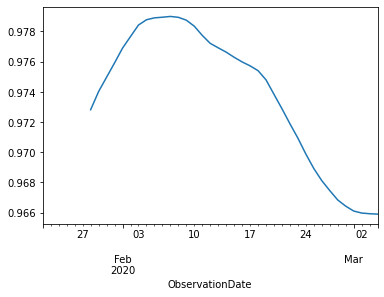

In [ ]:
sr.rolling(window=7).mean().plot() # Suavizado

Para comparar mis gráficas: 

Puedo ver que cada vez que elijo una ventana muy grande, va a ir aumentando el suavizado de mis curvas

Línea azul -> freq=1D

Línea naranja -> window=7

Línea verde -> window=14

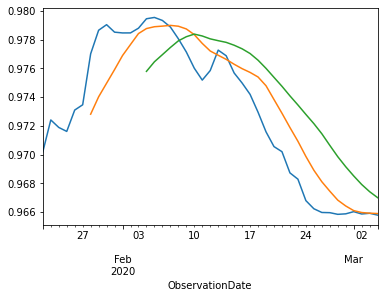

In [ ]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

Si quiero ver como ha ido variando la desviacion estandar de mi taza de supervivencia, puedo aplicar directamente sobre .rolling(window=14) la función .apply(lambda x: tengo que especificar la función que voy a usar (numpy) y traigo std(x) + .plot()

Cargo la libreria de numpy

In [ ]:
import numpy as np

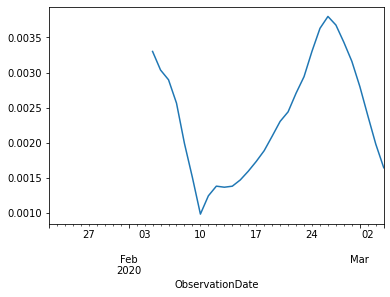

In [ ]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

Podemos concluir que la taza de supervivencia es alta y está cerca del 97%

En esta clase aprendimos a como utilizar herramientas de pandas para hacer análisis de series de tiempo, a como agrupar cuando tenemos columnas de tipo tiempo usando la función Grouper y también la importancia de trabajar con intervalos de tiempo y calcular suavizados de curvas con la función rolling

### ***VISUALIZACIÓN Y GRAFICACIÓN DE DATOS*** Clase Nº 26/29

 `¿Cuál es el país dónde mas ocurrencias de coronavirus existen?`

Voy a agrupar por el país con la variable Country/Region, voy a usar Confirmed y voy a seleccionar cuando este número es máximo, para poder ver los datos voy a usar sort_value(ascending=False)

In [ ]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [ ]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

Podemos ver que el pais con mas ocurrencias es Mainland China, seguido de South Korea e Italy


`Vamos a trabajar con china creando un nuevo grupo:`

Hacemos un groupby combinado, trabajando con paises y variables tipo tiempo

Usamos la función pd.Grouper(key='ObservationDate', seguido de esto coloco la frecuencia de mi intervalo freq='1D') y sumo todos estos datos con .sum()

Todo esto lo guardo en una nueva variable df_time

In [ ]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate', freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

`Para trabajar sólo con china:`

Es el paìs donde mas observaciones han ocurrido, lo hago con loc(localizar) y dentro de él coloco el nombre de china(Mainland China) seguido de esto coloco `,: ` para seleccionar todas las columnas


In [ ]:
df_china = df_time.loc['Mainland China',:]
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


Éste es mi nuevo df de trabajo que contiene sólo los datos de china

`Gráfica de mi df:`

Defino el tamaño de mi gráfica con fidgsize y le doy un título 

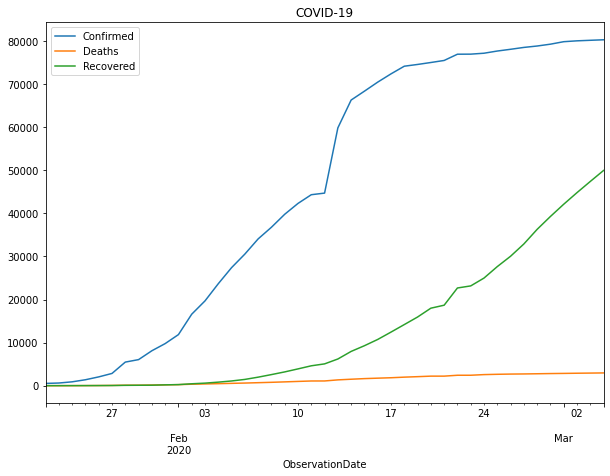

In [ ]:
df_china.plot(figsize = (10,7), title = 'COVID-19')

Si queremos adicionar información a nuestros ejes podemos hacerlo utilizando la librería de matployt

In [ ]:
import matplotlib.pyplot as plt

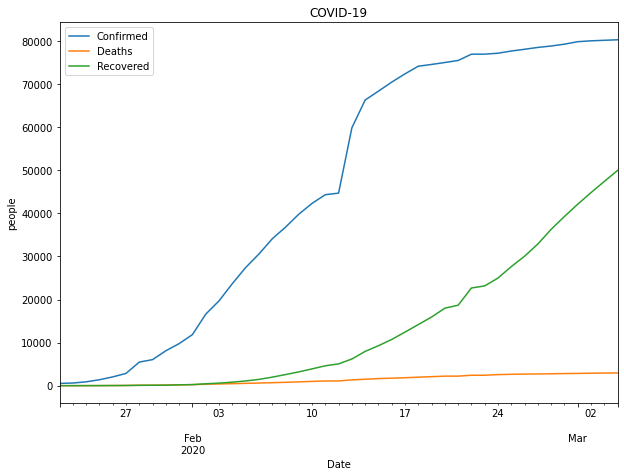

In [ ]:
df_china.plot(figsize = (10,7), title = 'COVID-19')
plt.xlabel('Date')
plt.ylabel('people')
plt.show() # Para ponerle nombre a los ejes

**Podemos editar muchas cosas de un mismo plot(grafica) simplemente hay que modificar algunos parámetros**

- Si quiero cambiar la leyenda a falso, o sea que no se muestre legend = False 

- Si quiero cambiar el estilo de mi gráfica 📊, style = [la primer linea sea roja y continua `'r-'`, la segunda linea verde y lineas punteadas `'g--'`, la tercer linea azul y de estrellitas `'b:*'` (y dentro de una lista de elementos voy a colocar las propiedades de cada una de mis gráficas)]

- En mi leyenda quiero que sea diferente a la original, la voy a crear con ax.legend(['1', 'dos', '3'])

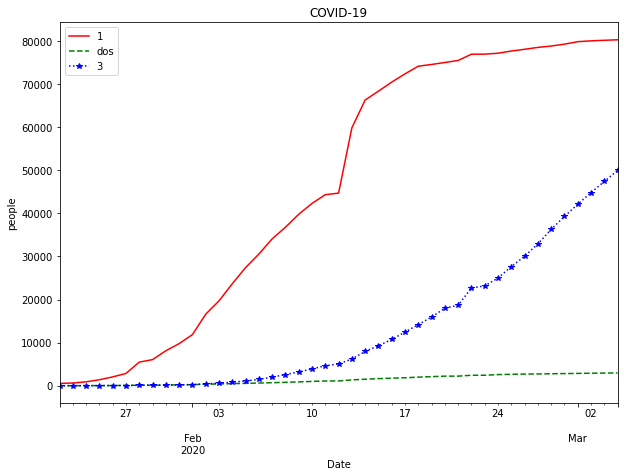

In [63]:
ax = df_china.plot(figsize = (10,7), title = 'COVID-19',
              legend = False,
              style = ['r-', 'g--', 'b:*'])
ax.legend(['1', 'dos', '3'])
plt.xlabel('Date')
plt.ylabel('people')
plt.show()

`Creamos un nuevo df para ver las ocurrencias mensuales`

Voy a obtener al final de cada mes cual era el caso máximo de pacientes confirmados, fallecidos y recuperados

In [64]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


Sobre el df_monthly voy a hacer una gráfica de barras 📊 con plot y solo tengo que especificar que son barras con (kind='bar')

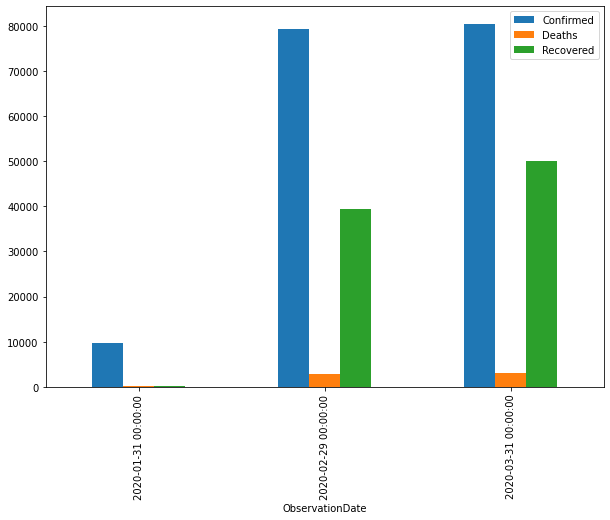

In [66]:
df_monthly.plot(figsize = (10,7), kind='bar')

`Lo que veo son las proporciones de cada uno de los casos para cada uno de los meses`

Para juntar todas las gráficas en una sóla con el comando stacked = True

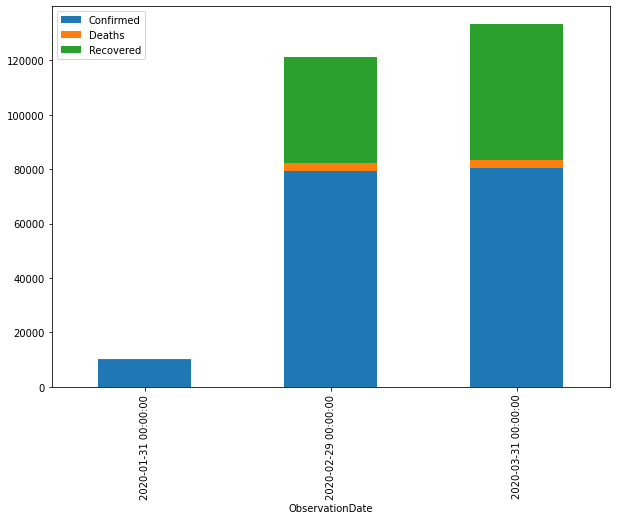

In [67]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked = True)

`Lo que obtengo es que todas las barras se sobreponen`

Voy a crear una nueva variable para hacer mejor el gráfico 

Sera una variable para las personas que han tenido tratamiento

In [69]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths'] - df_monthly['Recovered']
df_monthly # Los que estan en tratamiento

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


Sobre esto voy a hacer una gráfica tipo pastel con ['Deaths', 'Recovered', 'Traitment'] que sumados son los casos Confirmados

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f148afcf1d0>,
      dtype=object)

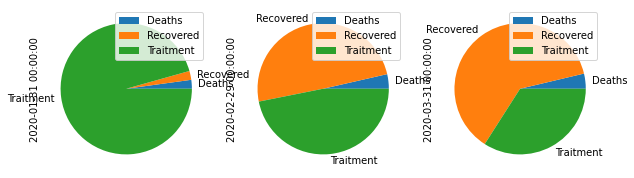

In [70]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (10,7), kind = 'pie', subplots=True)

`Lo que obtengo son tres tipos de graficas tipo pastel que me muestra la evolución del coronavirus en los meses`

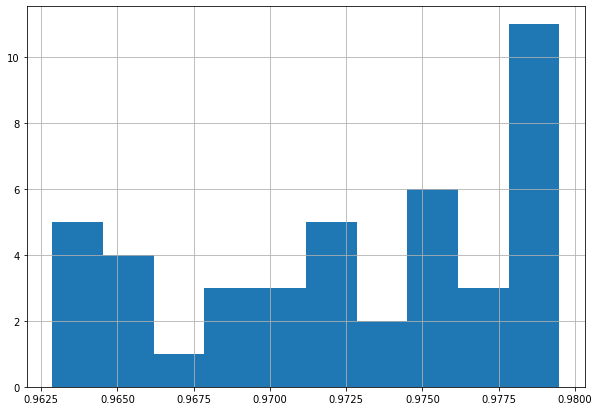

In [72]:
df_china['rate'] = 1 - df_china['Deaths']/df_china['Confirmed']
df_china['rate'].hist(figsize = (10,7), bins=10) # Para ver un histpgrama de como se distribuye la taza de supervivencia

Puedo cambiar el histograma agregando nuevas opciones y especificando el tipo de histogramna que queremos, en este caso uno para métrico('kde'):

`El truco para hacer nuevas graficas es cambiando el parámetro kind`

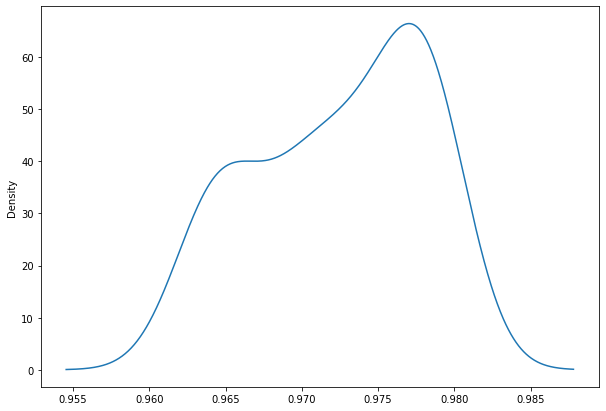

In [77]:
df_china['rate'].plot(kind = 'kde', figsize = (10,7))

Para hacer mas gráficas -> Buscar .plot, .plotting.boxplot, etc.

[pandas documentation](https://pandas.pydata.org/docs/)